$HW2$

Shiyu Chen

EE399

Git hub link: https://github.com/13RENDA/EE399-HW2.git

In [94]:
# Import
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from numpy import linalg 

Question(a)

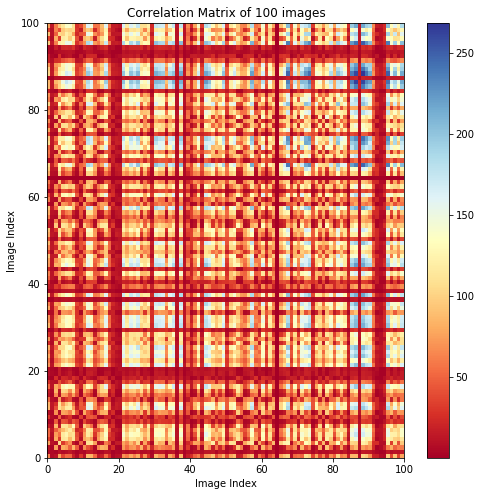

In [95]:
# Load yalefaces file
results=loadmat('yalefaces.mat')
X=results['X']

# Take the first 100 images 
X_100j = X[:,:100]

# Compute correlation matrix of the first 100 images
C = np.dot(X_100j.T, X_100j)

# Plot the correlation matrix
plt.figure(figsize=(8, 8))
plt.pcolor(C, cmap='RdYlBu')
plt.colorbar()
plt.title('Correlation Matrix of 100 images')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.show()

Question(b)

In [81]:
#make a copy of the correlation matrix
C_copy = np.copy(C)

#eliminate the result of the image comparing with itself 
np.fill_diagonal(C, 0)
np.fill_diagonal(C_copy, 1000)

most_idx = np.where(C == np.max(C))
least_idx = np.where(C_copy == np.min(C_copy))

print(f"The most correlated pictures are picture {most_idx[0][0]+1} and picture {most_idx[0][1]+1}")
print(f"The most uncorrelated pictures are picture {least_idx[0][0]+1} and picture {least_idx[0][1]+1}")

The most correlated pictures are picture 87 and 89
The least correlated pictures are picture 55 and 65


Text(0.5, 1.0, 'image 65')

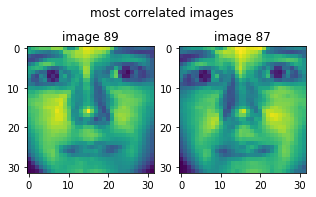

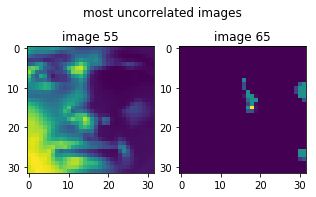

In [93]:
# Plot the most correlated and most uncorrelated images
fig1 = plt.figure(figsize=(5, 3))
fig2 = plt.figure(figsize=(5, 3))

# Set title to the plots
fig1.suptitle("most correlated images")
fig2.suptitle("most uncorrelated images")

X_88 = X[:, 86].reshape((32, 32), order='F')
X_86 = X[:, 88].reshape((32, 32), order='F')
X_54 = X[:, 54].reshape((32, 32), order='F')
X_64 = X[:, 64].reshape((32, 32), order='F')
uplot_88 = X_88.T
uplot_86 = X_86.T
uplot_54 = X_54.T
uplot_64 = X_64.T
ax1 = fig1.add_subplot(1, 2, 1)
ax2 = fig1.add_subplot(1, 2, 2)
ax3 = fig2.add_subplot(1, 2, 1)
ax4 = fig2.add_subplot(1, 2, 2)
ax1.imshow(uplot_88)
ax1.set_title("image 89")
ax2.imshow(uplot_86)
ax2.set_title("image 87")
ax3.imshow(uplot_54)
ax3.set_title("image 55")
ax4.imshow(uplot_64)
ax4.set_title("image 65")

Question(c)

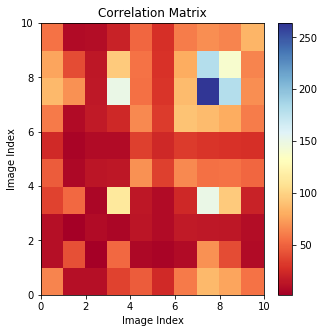

In [76]:
# Take the 10 designated images from yaleface
X_10j = X[:,[0, 312, 511, 4, 2399, 112, 1023, 86, 313, 2004]]

# Compute the correlated matrix between these 10 images
C_10 = np.dot(X_10j.T, X_10j)

# Plot the correlation matrix
plt.figure(figsize=(5, 5))
plt.pcolor(C_10, cmap='RdYlBu')
plt.colorbar()
plt.title('Correlation Matrix of 10 images')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.show()


Question(d)

In [99]:
# Create matrix Y
Y = np.dot(X, X.T)

# Compute the eigenvectors and eigenvalues of Y
eigenvalues, eigenvectors = np.linalg.eig(Y)

# Find the indices that sort the eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]

# Get the first six eigenvectors with the largest magnitude eigenvalue
v = eigenvectors[:, sorted_indices[:6]]

# Print the result
print(f"v: {v}")

v: [[ 0.02384327  0.04535378  0.05653196  0.04441826 -0.03378603  0.02207542]
 [ 0.02576146  0.04567536  0.04709124  0.05057969 -0.01791442  0.03378819]
 [ 0.02728448  0.04474528  0.0362807   0.05522219 -0.00462854  0.04487476]
 ...
 [ 0.02082937 -0.03737158  0.06455006 -0.01006919  0.06172201  0.03025485]
 [ 0.0193902  -0.03557383  0.06196898 -0.00355905  0.05796353  0.02850199]
 [ 0.0166019  -0.02965746  0.05241684  0.00040934  0.05757412  0.00941028]]


Question(e)

In [98]:
# Compute the SVD of X
U, S, Vt = np.linalg.svd(X)

# Get the first six principal component directions
u = U[:, :6]

# Print the result
print(f"u: {u}")

u: [[-0.02384327 -0.04535378 -0.05653196  0.04441826 -0.03378603  0.02207542]
 [-0.02576146 -0.04567536 -0.04709124  0.05057969 -0.01791442  0.03378819]
 [-0.02728448 -0.04474528 -0.0362807   0.05522219 -0.00462854  0.04487476]
 ...
 [-0.02082937  0.03737158 -0.06455006 -0.01006919  0.06172201  0.03025485]
 [-0.0193902   0.03557383 -0.06196898 -0.00355905  0.05796353  0.02850199]
 [-0.0166019   0.02965746 -0.05241684  0.00040934  0.05757412  0.00941028]]


Question(f)

In [101]:
# Compute the norm of the difference of their absolute values
norm_diff = np.linalg.norm(np.abs(v[0]) - np.abs(u[0]))

# Print the result
print(f"The normal difference is: {norm_diff}")

The normal difference is: 1.261524498888461e-15


Question(g)

The percentage of variance of the first 6 SVD modes are: [72.92756746909564, 15.281762655694362, 2.5667449429852702, 1.8775248514714737, 0.6393058444446512, 0.5924314415034914]


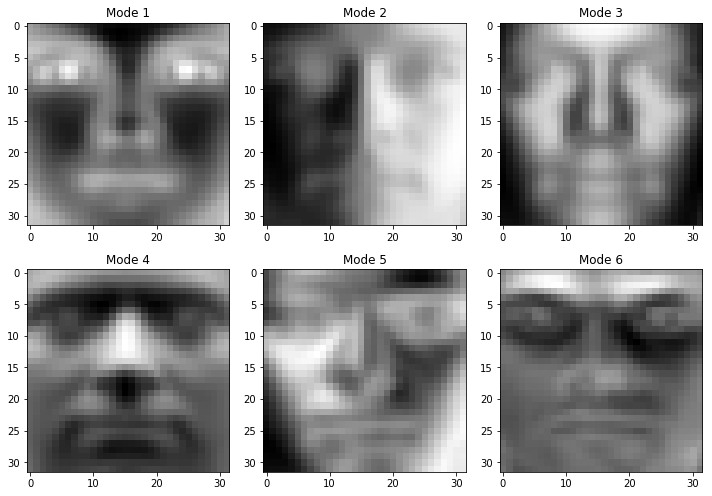

In [104]:
# Compute the percentage of variance of the first 6 SVD modes
perc_of_var = [(S[i] ** 2 / np.sum(S**2)) * 100 for i in range(6)]
print(f"The percentage of variance of the first 6 SVD modes are: {perc_of_var}")

# Plot the first 6 SVD modes as images
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
for i, ax in enumerate(axes.flat):
    if i >= 6:
        break
    ax.imshow(U[:, i].reshape(32, 32), cmap='gray')
    ax.set_title(f"Mode {i+1}")
plt.tight_layout()
plt.show()